In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
notebook_dir= os.getcwd()
sys.path.append(os.path.join(notebook_dir, '..', 'scripts'))
from eda import Descriptive
from Publisher_analysis import publisher
from Sentiment_analysis import sentiment
from logger import SetupLogger
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

In [2]:

df=pd.read_csv('../Data/raw_analyst_ratings.csv')
news_= Descriptive(df,logger)
publish= publisher(df,logger)
sen= sentiment(df,logger)

In [3]:
# Calculate the length of each headline and getting stats about the column
news_.headline_length()


,Unnamed: 0,headline,url,publisher,date,stock,headline length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54


In [4]:
#calculating the how many articles have the pulisherd published and storing the count in article count
news_.stock()

,stock,stock count
3699,MRK,3333
3707,MS,3238
4004,NVDA,3146
3752,MU,3142
4597,QQQ,3106


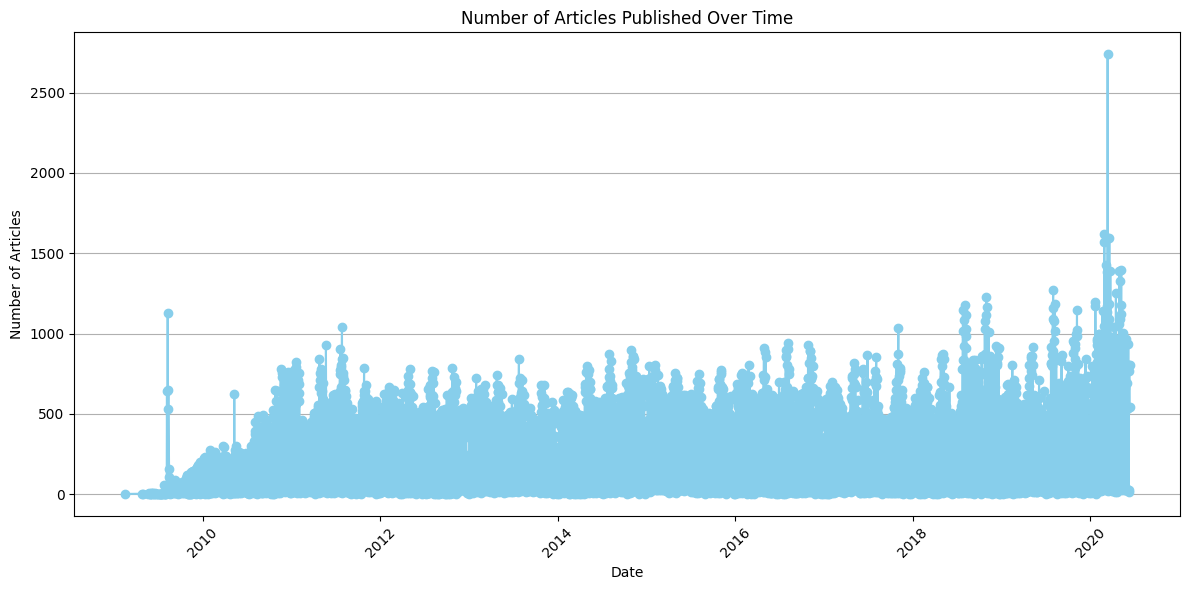

In [5]:
# This displays Number of articles published over time

news_.plot_article_over_time()


In [6]:
#This displays if the top 3 publishers
publish.count_publisher()

['Paul Quintaro', 'Lisa Levin', 'Benzinga Newsdesk']

In [7]:
# Domanis of publishing companies
publish.count_unique_domains()

{'benzinga.com': 7937,
 'gmail.com': 139,
 'andyswan.com': 5,
 'investdiva.com': 2,
 'eosdetroit.io': 1,
 'tothetick.com': 2,
 'forextraininggroup.com': 1,
 'stockmetrix.net': 1}

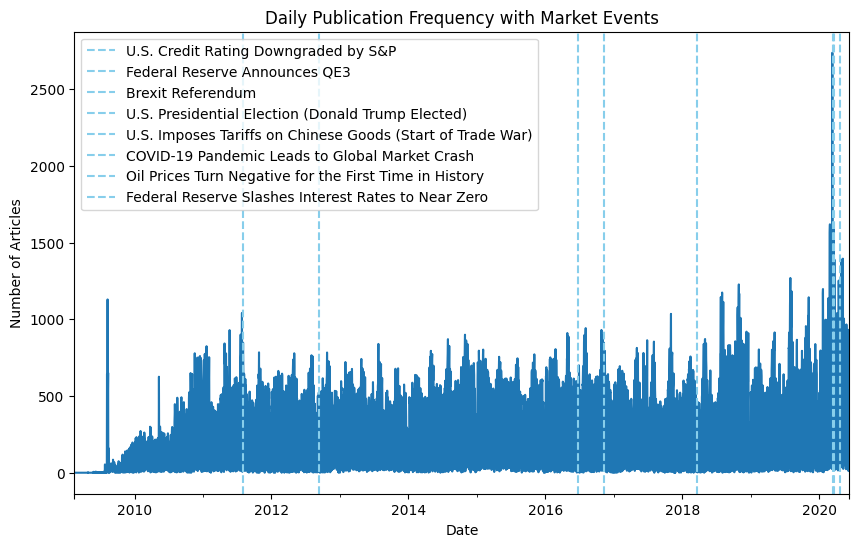

In [8]:
# Moajor events and number of publication
publish.event()

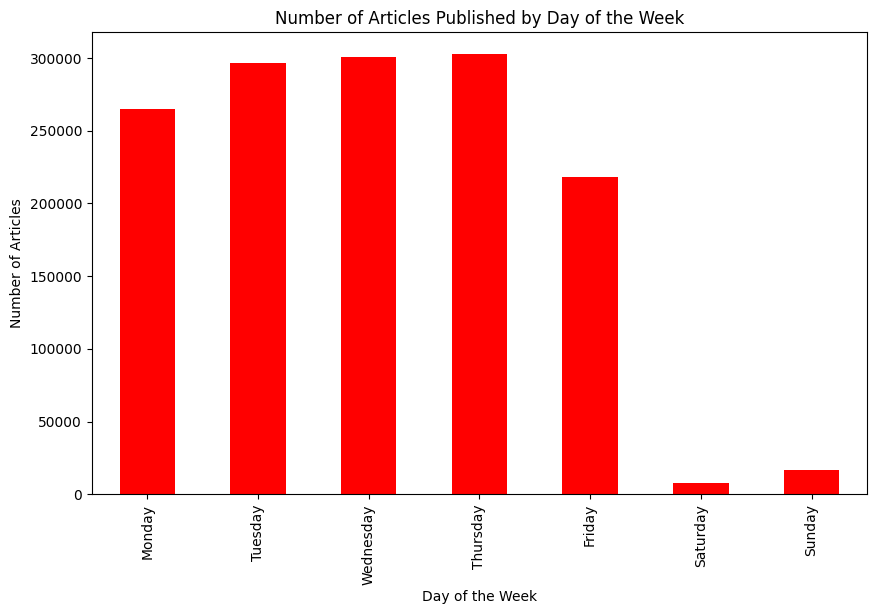

In [9]:
# Displays companies with the most publish
publish.pub_days_time()

In [10]:
sen.sentiment_analysis('../Data/financial_news.csv')

,headline,processed_headline,date,score,keywords,sentiment
0,Stocks That Hit 52-Week Highs On Friday,stock hit high friday,2020-06-05,0.16,"[stock, friday]",Positive
1,Stocks That Hit 52-Week Highs On Wednesday,stock hit high wednesday,2020-06-03,0.16,"[stock, wednesday]",Positive
2,71 Biggest Movers From Friday,71 biggest mover friday,2020-05-26,0.00,"[mover, friday]",Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,46 stock moving friday session,2020-05-22,0.00,"[stock, friday, session]",Neutral
4,B of A Securities Maintains Neutral on Agilent...,b security maintains neutral agilent technolog...,2020-05-22,0.00,"[security, agilent, technology, raise, price, ...",Neutral
...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,top narrow based index august 29,2011-08-29,0.15,"[index, august]",Positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,recap wednesday top percentage gainer loser,2011-06-22,0.50,"[recap, wednesday, percentage, gainer, loser]",Positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,update oppenheimer color china zenix auto init...,2011-06-21,0.00,"[oppenheimer, color, china, zenix, auto, initi...",Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,oppenheimer initiate china zenix outperform 8 pt,2011-06-21,0.00,"[oppenheimer, initiate, china, zenix, pt]",Neutral
